#  Scikit-learn(sklearn)
This notebook denonstrates some of the moset useful functions of Scikit-Learn Library

What we ar going to cover:
0. An en-to-en Scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm/moel for our problems
3. Fit the model/algorithm/Estimator an use it to make predictions on our data
4. Evaluating a Model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An en-to-end Scikit-learn workflow

In [2]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (feature matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [5]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we'll keep the default hyperparameters
clf.get_params() #these are randomForest Parameters (clf.get_params)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train);

In [8]:
# Make a prediction
y_label = clf.predict(np.array[(0,2,3,4)])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
heart_disease.shape

In [ ]:
y_preds = clf.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
#4. Evaluate the model
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
accuracy_score(y_test, y_preds)

In [ ]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 70, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print ("")

In [ ]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [ ]:
loaded_model = pickle.load(open('random_forest_model_1.pkl',"rb"))
loaded_model.score(X_test, y_test)

In [ ]:
import sklearn
sklearn.__version__ , sklearn.show_versions()

## 1. Getting pur data ready to be used with machine learning

Three main things we have to do
1. split the data into features and labels(usually `X` & `Y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
X = heart_disease.drop('target', axis=1)
X.head()

In [ ]:
y = heart_disease['target']
y.head()

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X.shape[0]*0.8

In [ ]:
len(heart_disease)

### 1.1 Makesure it's all numerical

In [ ]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

In [ ]:
car_sales['Doors'].value_counts()

In [ ]:
car_sales.dtypes

In [ ]:
len(car_sales)

In [ ]:
# Split the data into X/Y
X= car_sales.drop('Price', axis=1)
y= car_sales['Price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(x_test, y_test)

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one-hot',
                                 one_hot,
                                 categorial_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X).head()

In [ ]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train, y_train);

In [ ]:
model.score(X_test, y_test)

### What if thre wer missing values
1. Fill them with some values(also know as imputation)
2. Remove the samples with missing ata altogether
3. 

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X and y
X= car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# lets's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
print(car_sales_missing.to_string())

In [ ]:
print (pd.DataFrame(transformed_X))

In [ ]:
car_sales_missing['Doors'].value_counts()

### Option 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make" column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Remove rows with missing price 
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X= car_sales_missing.drop('Price', axis=1)
y= car_sales_missing['Price']

In [ ]:
# lets's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

### Option 2: Fill missing values with scikit learn

In [ ]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y= car_sales_missing['Price']

In [ ]:
X.isna().sum()

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing and numerical values with mean
car_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

#Define columns
car_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('car_imputer', car_imputer, car_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X,
                              columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
len(car_sales_filled)

In [ ]:
# lets's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
# Now we got our data as numers and filled (no missing values)
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
len(car_sales_filled), len(car_sales)

### 1. The process of filling in missing values is called imputation
### 2. The process of turning non numerical values into numerical values id called feature engineering 

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
    * Sklearn refers to machine learning models, algorithms as estimators
    * Classification problem = predicting a category (heart disease or not)
        * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
    * Reression problem - predicting a number (selling price of a car)
    
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 picking a machine learning model for a regression problem
Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [ ]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
housing_df = pd.DataFrame(housing['data'], columns = housing ['feature_names'])
housing_df

In [ ]:
housing_df['target'] = housing ['target']
housing_df

In [ ]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

#check the score of the model(on the test set)
model.score(X_test, y_test)

what if `Ridge` dindn't work or the score didn't fit our needs?
well, we could always try a different model...
How about we try an ensemble model (an ensembel is a combination of smaller models to try and male better predictions 
                                   than just a single model)
Sklearn ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html
        

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

## 2.2 Choosing an estimator for a classification problem
Lets go to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

Consulting the map and it says to try Linear SVC

In [ ]:
# import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setip random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Linear SVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)


In [ ]:
heart_disease['target'].value_counts()

In [ ]:
# import the RandomForest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setip random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)


Tidbit:


    1. If you have stractured data use ensemble methods
    2. of you have unstractured data use deeplearning or transfer learning

## 3. Fit the model / algorithm / estimator on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* X = feature, feature variables, data
* y = labels, targets, target variables

In [ ]:
# import the RandomForest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setip random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learnt)
clf.score(X_test, y_test)


In [ ]:
X.head()

In [ ]:
y.head(), y.tail()

### 3.2 Make Predictions using machine learning models

2 ways to make predicions:
1. `predict()`
2. `predict_proba()`

In [ ]:
# use a trained model to make predictions
clf.predict(np.array[1,7,8,3,4]) # this doesn't work

In [ ]:
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

Make predictions wiht predict_proba()


In [ ]:
# predict_proba() returns probabilities of a clsssification label
clf.predict_proba(X_test[:5])

In [ ]:
# Let's predict () on thesame data...
clf.predict(X_test[:5])


In [ ]:
heart_disease['target'].value_counts()

`predict()` can also be used for regression models

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [ ]:
y_pred[:10]

In [ ]:
np.array([y_test[:10]])

In [ ]:
len(y_preds), len(y_test)

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

In [ ]:
housing_df['target'] 

### 4. Evaluating a machine learning model

Three ways to evaluate Scikit=Learn models/estimators: 


    1. Estimator's built-n score() method
    2, THe 'scoring' parameter
    3. Problem-specific metric function
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

#training
clf.fit(X_train, y_train)



In [ ]:
# the highestvaloue for the score method is 1.0 the lowest is 0.0
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

let's use the score() on our regression algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators = 100)

# Fit the model to the data
model.fit(X_train, y_train)



In [ ]:
model.score(X_test, y_test)

In [ ]:
model.score(X_train, y_train)

In [ ]:
y_test.mean()

### 4.2 Evaluating a model using the `Scoring` parameter 

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

#training
clf.fit(X_train, y_train);



In [ ]:
clf.score(X_test, y_test)

In [ ]:
cross_val_score(clf, X, y) # Uses Cross-validation

In [ ]:
cross_val_score(clf, X, y, cv=10) # Uses Cross-validation

In [ ]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))
                              
# Compare the two
clf_single_score, clf_cross_val_score

In [ ]:
# Default scoring param

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, scoring=None)

### 4.2.1 Classification model evaluation metrics


1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [ ]:
heart_disease.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print (f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

**Area under the recieiver operating characteristic curve (AUC/ROC)**


* Areau Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True Positive = model predicts 1 when truth is 1
* False positive  = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative  = model predict 0 when truth is 1

In [ ]:
# Create X_test ... etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fi the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr, tpr and threshold
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

In [ ]:
# Create a fuction for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    # plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize th plot
    plt.xlabel('False positie rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('reciever Operating Characterist (ROC) curve')
    plt.legend()
    plt.show
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

In [ ]:
# Plot perfect ROC curve and UC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
# perfect AUC score
roc_auc_score(y_test, y_test)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was
supposed to predict

In essence, giving you an idea of where the model is getting confused

In [9]:
# See here for sklearn confusion matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[19,  5],
       [10, 27]], dtype=int64)

In [13]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Label'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,19,5
1,10,27


<Axes: >

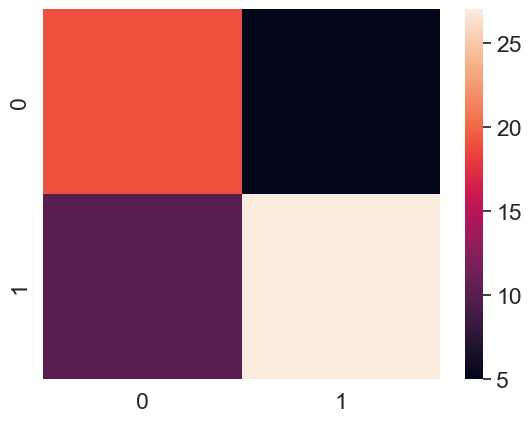

In [12]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot is using seaborn
sns.heatmap(conf_mat)

In [ ]:
### Crearting a confusion matrix using Scikit-learn
To use the new methods of creating  confusion matrix with Scikit-learn.you will need sklearn verion 1.0+

In [15]:
import sklearn
sklearn.__version__

'1.2.1'

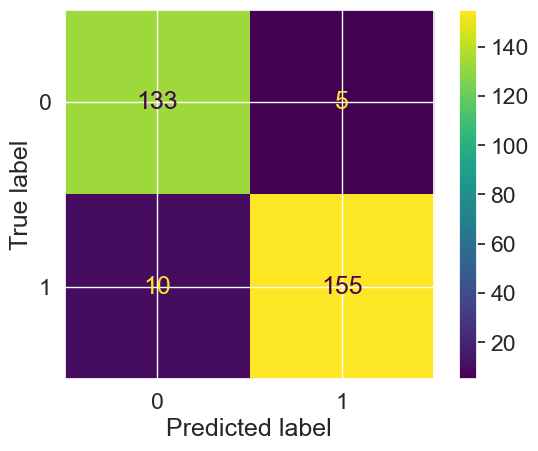

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

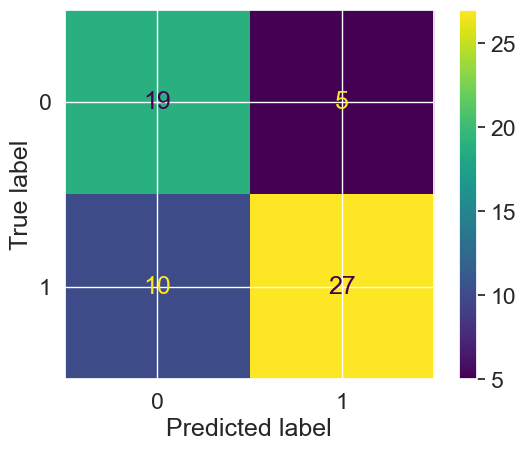

In [20]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)